<a href="https://colab.research.google.com/github/ggarci10/refactored-meme/blob/main/final_project_twitch_game_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns



In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/Twitch_game_data%202016-2019.csv")
df.head()


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [11]:
goty = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/the_game_awards.csv")



In [12]:
goty_2016 = goty[goty['year'] == 2016]
goty_2017 = goty[goty['year'] == 2017]
goty_2018 = goty[goty['year'] == 2018]
print(goty_2016.head())

     year          category                     nominee  \
215  2016  Game of the Year                   Overwatch   
216  2016  Game of the Year                        Doom   
217  2016  Game of the Year                      Inside   
218  2016  Game of the Year                 Titanfall 2   
219  2016  Game of the Year  Uncharted 4: A Thief's End   

                    company  winner voted  
215  Blizzard Entertainment       1  jury  
216             id Software       0  jury  
217                Playdead       0  jury  
218   Respawn Entertainment       0  jury  
219             Naughty Dog       0  jury  


In [13]:
mask2016 = df['Year'] == 2016

df_2016 = pd.DataFrame(df[mask2016])

# print(df_new)
grouped2016  = df_2016.groupby("Game")
# sum and average the other information by game

result2016 = grouped2016.agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_channels": "max", "Streamers": "mean"})
print(result2016)

                                                            Game  \
Game                                                               
60 Seconds!                                          60 Seconds!   
7 Days to Die                                      7 Days to Die   
ABZ<U+00DB>                                          ABZ<U+00DB>   
APB Reloaded                                        APB Reloaded   
ARAYA                                                      ARAYA   
...                                                          ...   
Z1: Battle Royale                              Z1: Battle Royale   
Zelda II: The Adventure of Link  Zelda II: The Adventure of Link   
Zero Escape: Zero Time Dilemma    Zero Escape: Zero Time Dilemma   
iRacing                                                  iRacing   
osu!                                                        osu!   

                                 Hours_watched  Hours_streamed  Peak_channels  \
Game                              

In [14]:
mask2017 = df['Year'] == 2017

df_2017 = pd.DataFrame(df[mask2017])

# print(df_new)

grouped2017  = df_2017.groupby("Game")
# sum and average the other information by game

result2017  = grouped2017 .agg({"Game" : "first" ,"Hours_watched": "sum", "Hours_streamed": "max", "Peak_channels": "max", "Streamers": "mean"})
print(result2017)



                                                    Game  Hours_watched  \
Game                                                                      
.hack//G.U. Last Recode          .hack//G.U. Last Recode         145350   
60 Seconds!                                  60 Seconds!         623520   
7 Days to Die                              7 Days to Die        8305182   
<U+014C>kami                                <U+014C>kami         181539   
A Hat in Time                              A Hat in Time         709295   
...                                                  ...            ...   
Yu-Gi-Oh! Duel Links                Yu-Gi-Oh! Duel Links        1879042   
Z1: Battle Royale                      Z1: Battle Royale       89752462   
iRacing                                          iRacing         139492   
osu!                                                osu!        6680504   
theHunter: Call of the Wild  theHunter: Call of the Wild        1867184   

                        

In [15]:
mask2018 = df['Year'] == 2018

df_2018 = pd.DataFrame(df[mask2018])

# print(df_new)

grouped2018  = df_2018.groupby("Game")
# sum and average the other information by game

result2018  = grouped2018.agg({"Game" : "first" ,"Hours_watched": "sum", "Hours_streamed": "max", "Peak_channels": "max", "Streamers": "mean"})
print(result2018)

                                                                                                Game  \
Game                                                                                                   
60 Parsecs!                                                                              60 Parsecs!   
60 Seconds!                                                                              60 Seconds!   
7 Days to Die                                                                          7 Days to Die   
A Hat in Time                                                                          A Hat in Time   
A Way Out                                                                                  A Way Out   
...                                                                                              ...   
Z1: Battle Royale                                                                  Z1: Battle Royale   
Zero Escape: Nine Hours, Nine Persons, Nine Doors  Zero Escape: 

In [16]:
result2016.reset_index(drop=True, inplace=True)
# Rename the 'nominee' column in goty_df to 'Game' to match with results_df
goty_2016 = goty_2016.rename(columns={'nominee': 'Game'})

# Merge the dataframes based on the 'Game' column
merged_df = pd.merge(goty_2016, result2016, on='Game')

# Select the 'Game', 'winner', and 'category' columns
selected_df = merged_df[['Game', 'winner', 'category','Hours_watched', 'Hours_streamed', 'Peak_channels']]
encoded_df = selected_df.drop_duplicates(subset='Game', keep='first')
#shows all categories
encoded_df
#only shows goty
goty_df = encoded_df[encoded_df['category'] == 'Game of the Year']


In [17]:

# folder = "D:\\desktop\\all coding ive done\\"
# file = "result2016.xlsx"
# # create an ExcelWriter object
# writer = pd.ExcelWriter(folder + file, engine="xlsxwriter")
# # write the dataframe to the excel file
# goty_df.to_excel(writer, index=False)
# # save and close the writer
# writer.save()

In [18]:

#this returns only one winner on the category goty
# goty_winners = set(goty_df.loc[goty_df['winner'] == 1, 'Game'])

# # Create a new column 'goty' in the 'result2016' dataframe
# # If the game is a Game of the Year winner, set 'goty' to 1, otherwise set it to 0
# result2016['goty'] = result2016['Game'].apply(lambda x: 1 if x in goty_winners else 0)


In [19]:

# folder = "D:\\desktop\\all coding ive done\\"
# file = "result2016.xlsx"
# # create an ExcelWriter object
# writer = pd.ExcelWriter(folder + file, engine="xlsxwriter")
# # write the dataframe to the excel file
# result2016.to_excel(writer, index=False)
# # save and close the writer
# writer.save()

In [20]:
encoded_df


,Game,winner,category,Hours_watched,Hours_streamed,Peak_channels
0,Overwatch,1,Game of the Year,178952454,1141859,9741
6,Titanfall 2,0,Game of the Year,3217479,51299,379
10,Uncharted 4: A Thief's End,0,Game of the Year,6336406,140927,739
15,Battlefield 1,0,Developer of the Year,20187602,396583,1548
19,Firewatch,0,Best Narrative,1569072,28712,700
22,Mafia III,0,Best Narrative,2969888,134571,1429
23,Hyper Light Drifter,0,Best Independent Game,256429,11517,120
25,Stardew Valley,0,Best Independent Game,9902673,137735,375
26,The Witness,0,Best Independent Game,1209558,16728,193
27,Clash Royale,0,Best Mobile/Handheld Game,13483949,28640,86


In [21]:

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [22]:
feature_cols = ['Hours_watched','Hours_streamed','Peak_channels']
feature_cols1 = ['Hours_watched']
feature_cols2 = ['Hours_streamed']
feature_cols3 = ['Peak_channels']



In [23]:
X = encoded_df[feature_cols]
X1= encoded_df[feature_cols1]
X2=encoded_df[feature_cols2]
X3=encoded_df[feature_cols3]

In [24]:
y=encoded_df['winner']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.6, random_state=10)
#print(y_test)
print(X_test)

    Hours_watched  Hours_streamed  Peak_channels
41         518236           18307            109
25        9902673          137735            375
22        2969888          134571           1429
10        6336406          140927            739
15       20187602          396583           1548
42        1390974           50930            430
32         780678           10301            117
48      526391918          830105           2197
31        2540883           49624            389
6         3217479           51299            379
40        7668219          101051            782
34       43746685          749702           3238
39        4697524           28006            418
23         256429           11517            120
29        4570995          158079           1239
44        1410572            9580             72
45       10523416          198380           1778
49      496585969          433397           1100


In [32]:
#this is used with 3 classifiers
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg)
print(round(logregaccuracy, 2))
#using only one  peak channels
my_logreg1 = LogisticRegression()
my_logreg1.fit(X_train1,y_train1)
y_predict_logreg=my_logreg1.predict(X_test1)
logregaccuracy=accuracy_score(y_test1,y_predict_logreg)
print(round(logregaccuracy, 2))
# it increases its accuracy by using peak channel



0.22
0.89


<Axes: xlabel='Hours_watched', ylabel='winner'>

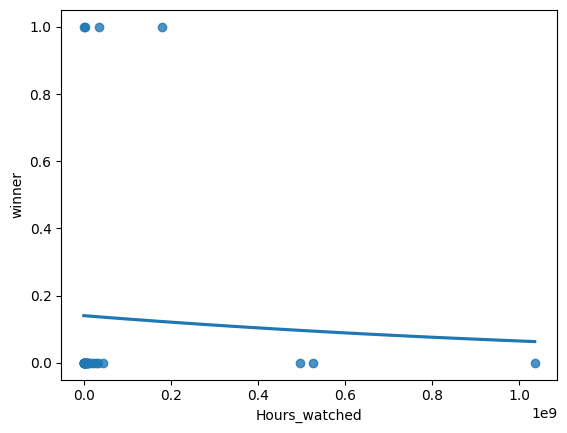

In [27]:
sns.regplot(x=X1, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='Hours_streamed', ylabel='winner'>

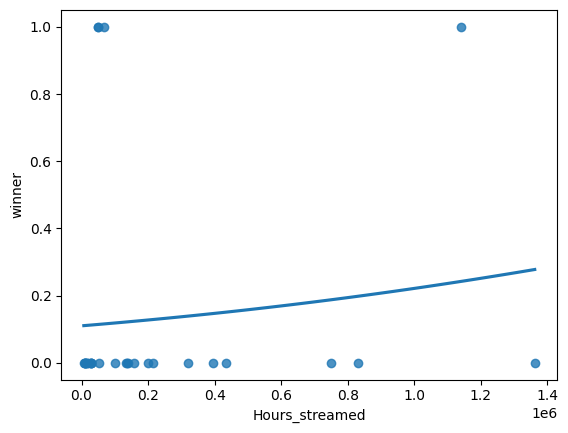

In [28]:
sns.regplot(x=X2, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='Peak_channels', ylabel='winner'>

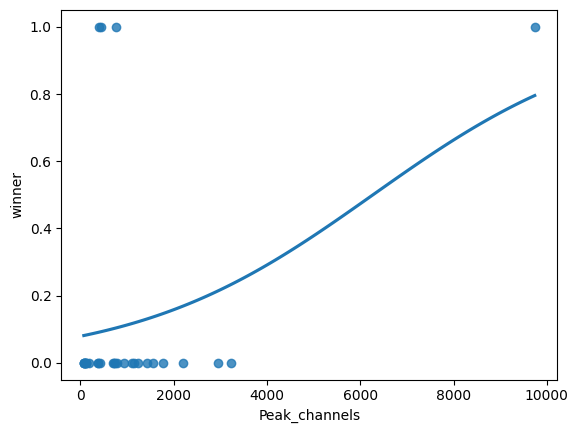

In [29]:
sns.regplot(x=X3, y=y, data=df, logistic=True, ci=None)

In [30]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt=my_decisiontree.predict(X_test)
mdtaccuracy= accuracy_score(y_test,y_predict_mdt)
print(round(mdtaccuracy,2))

0.72


In [31]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn)

print(round(knnaccuracy,2))

0.89
